Suppose X is the data have n samples with p-dimensional, X is n*p, y is the label of data, d is a dimension to reduction.
* fda = FDA(d)
>d is the dimension to reduction.
* fda.train(X, y)
>return n*d data
* fda.plot(plt, X, y)
>show on 2 - dimensional

In [3]:
#python program
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import matplotlib as mpl 
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 

In [59]:
class FDA:
  def __init__(self, d = 2):
    self.d = d
  def train(self, x, y):
    n, p = x.shape #x is n*p
    self.k = len(np.unique(y))
    #Classification
    X = [[] for i in range(self.k)]; t = 0
    for i in y:
      i = int(i[0])
      X[i].append(x[t]); t = t + 1
    #Sw & Sb
    Sw = np.zeros((p, p))
    for j in range(self.k):
      Sw += np.cov(np.matrix(X[j]).T)
    St = np.cov(x.T)
    Sb = St - Sw
    #find W 
    eigen_vals, eigen_vecs = linalg.eigh(Sb, Sw)
    eigen_pairs = [(eigen_vals[i], eigen_vecs[:, i]) for i in range(len(eigen_vals))]
    eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

    W = eigen_pairs[0][0] * eigen_pairs[0][1][:, np.newaxis].real
    for i in range(1, self.d):
      W = np.hstack((W, eigen_pairs[i][0] * eigen_pairs[i][1][:, np.newaxis].real))
    self.W = W
  def plot(self, plt, x, y):
    B = np.dot(x, self.W)
    fig, ax = plt.subplots(figsize = (5, 5))
    scatter = ax.scatter(B[:, 0], B[:, 1], s = 2, c = y[:], cmap = 'tab10')

    legend1 = ax.legend(*scatter.legend_elements(), title="Classes", loc = "upper right")
    ax.add_artist(legend1)

### Example1 - swiss roll

In [5]:
# 生成 X
n=1000
x = np.array(range(n))
t = 3 * math.pi * x / n
a = [r * math.cos(r) for r in t];
b = [5 * random.random() for i in range(n)];
c = [r * math.sin(r) for r in t];
X = np.matrix([a, b, c])
rand_axis = [1, 1, 1]; radian = 60
M = linalg.expm(np.cross(np.eye(3), rand_axis / linalg.norm(rand_axis) * radian))
X = np.array(M.dot(X) + 10 * np.random.rand(3, 1).dot(np.ones((1, n)))).T

In [19]:
y = np.array([i * np.ones(100) for i in range(10)]).reshape(1000, 1)

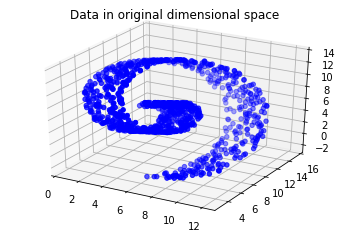

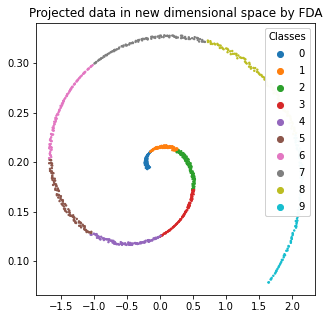

In [60]:
# FDA implement reduction to 2-dim
fda = FDA(2)
fda.train(X, y)

# 在三維顯示投影結果
fig1 = plt.figure() #視窗1
fig1.canvas.set_window_title("3-dimension")
ax = plt.subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = 'b') #原資料點
plt.title('Data in original dimensional space')

# 投影結果
fda.plot(plt, X, y) #投影點在新維度上座標
plt.title('Projected data in new dimensional space by FDA')

plt.show()

### Example2 - Torodial helix

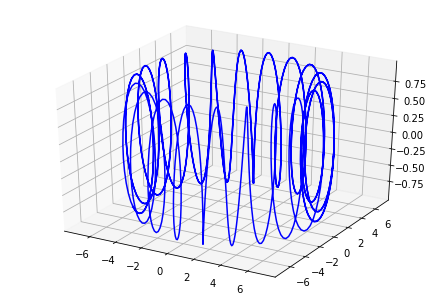

In [61]:
import math
def Helix(R, r, n):
  t = np.linspace(0, 10, 1000)
  x = (R + r * np.cos(n*t))*np.cos(t)
  y = (R + r * np.cos(n*t))*np.sin(t)
  z = r * np.sin(n*t)
  return np.array([x, y, z]).T
helix = Helix(6, 1, 20)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(helix[:, 0], helix[:, 1], helix[:, 2], c = 'b')

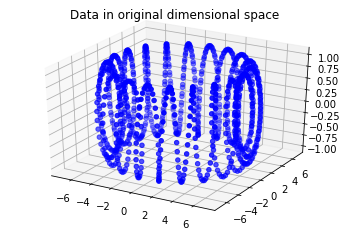

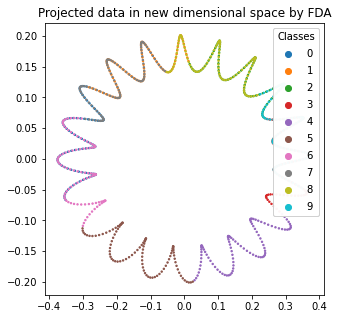

In [62]:
X = helix
#FDA
fda = FDA(2)
fda.train(X, y)

# 在三維顯示投影結果
fig1 = plt.figure() #視窗1
fig1.canvas.set_window_title("3-dimension")
ax = plt.subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = 'b') #原資料點
plt.title('Data in original dimensional space')

# 投影結果
fda.plot(plt, X, y) #投影點在新維度上座標
plt.title('Projected data in new dimensional space by FDA')

plt.show()